In [99]:
import numpy as np
import matplotlib.pyplot as plt
from rays import *
plt.rcParams['figure.figsize'] = [8, 8]

In [2]:
uniform = Distribution(ParticleGenerator.Uniform,Analytic.Uniform)
sim1 = Simulation(args(r=100,n=10,p=100),uniform)

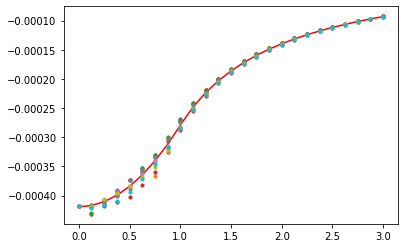

In [45]:
vecs = angles2vectors(*randangles(10))
default_ray = Ray(vector=np.array([1,0,0]),length=300)
for vec in vecs:
    plot_ray(sim1,vec,300)
#plt.plot(default_ray.rs(),-1/default_ray.rs())
plt.plot(default_ray.rs()/sim1.r,default_ray.analytic_phis(sim1),label="Analytic",zorder=0,color="red")
plt.show()

In [124]:
bin_size = 5e-06
vecs = angles2vectors(*randangles(100))
default_ray = Ray(vector=np.array([1,0,0]),length=200)
ns = [10,100,1000]
ray_diff_arr = []
r = 100
p = 100
for n in ns:
    sim = Simulation(args(r=100,n=n,p=100),uniform)
    ray_diffs = []
    for vec in vecs:
        ray = Ray(vec,200)
        dist,ana = sim.phis(ray(1000))
        ray_diffs.append(dist-ana)
    ray_diff_arr.append(np.array(ray_diffs).flatten())



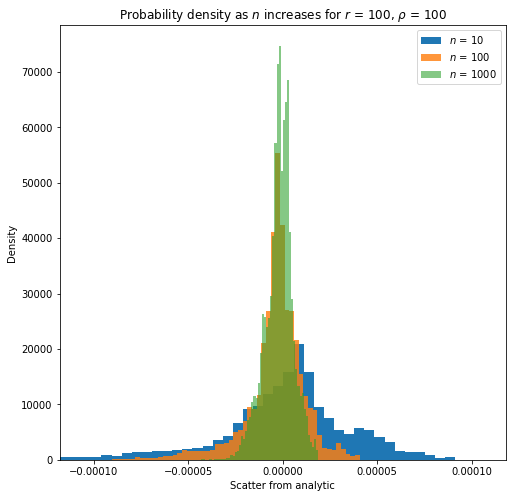

In [125]:
for idx,ray_diffs,n in zip(np.arange(len(ray_diff_arr)),ray_diff_arr,ns): 
    plt.hist(ray_diffs,density=True,histtype='bar',label=r"$n$ = "+str(n),bins=100,zorder=idx,alpha=((len(ray_diff_arr)-idx)/len(ray_diff_arr))**(1/2))
current = plt.xlim()[1]
plt.xlim(-current,current)
plt.legend()
plt.title(r"Probability density as $n$ increases for $r$ = " + str(r) + r", $\rho$ = " + str(p))
plt.xlabel("Scatter from analytic")
plt.ylabel("Density")
plt.show()